# Plane Predictor

**Background:** Airline delays and cancellations pose significant challenges to
passengers, airlines, and airport operations. Predicting and understanding the 
factors that contribute to these delays can help mitigate their impact, improve 
passenger satisfaction, and optimize operational efficiency.

**Objective:** Predict if a flight will be delayed or not based on various 
factors, such as weather and airline.


Information about the dataset used in this project is in 
`dataset_documentation.txt`. Target variable is `DEP_DEL15`, which is 1 if the 
flight departed more than 15 minutes after their planned orginal depature time,
and 0 otherwise.

Since the training dataset has 4 million flights of data, I randomly sampled 500,000 
flights and stored it in `train.csv`. If you would like to see the full datasets,
check out this [link](https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations/data).

In this notebook, I use ...

In [41]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
'''
    Code used to randomly sample the training and testing dataset and reduce the
    size, improving run time of this whole program

# Training:
file_path = 'train.csv'
df = pd.read_csv(file_path)
df_sampled = df.sample(n=350000, random_state=1)
df_sampled.to_csv(file_path, index=False)

# Testing:
file_path = 'test.csv'
df = pd.read_csv(file_path)
df_sampled = df.sample(n=100000, random_state=1)
df_sampled.to_csv(file_path, index=False)
'''

"\n    Code used to randomly sample the training and testing dataset and reduce the\n    size, improving run time of this whole program\n\n# Training:\nfile_path = 'train.csv'\ndf = pd.read_csv(file_path)\ndf_sampled = df.sample(n=350000, random_state=1)\ndf_sampled.to_csv(file_path, index=False)\n\n# Testing:\nfile_path = 'test.csv'\ndf = pd.read_csv(file_path)\ndf_sampled = df.sample(n=100000, random_state=1)\ndf_sampled.to_csv(file_path, index=False)\n"

In [43]:
# Load and view data
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [44]:
# Ignore warnings
warnings.filterwarnings('ignore') 

## Exploratory Data Analysis

**Goal:** Analyze and summarize the main characteristics of this dataset

In [45]:
# Allow all columns to be displayed
pd.set_option('display.max_columns',None)

In [46]:
# Check the Shape of the Dataset
print(f"Dimensions of Dataset: {df.shape}")

Dimensions of Dataset: (350000, 30)


In [47]:
# View some of the Dataset
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,8,7,0,1800-1859,2,5,12,157,Delta Air Lines Inc.,9144,91062,644,1093478,12460183,0.000144,0.000149,28,Friendship International,39.176,-76.671,Detroit Metro Wayne County,0.0,0.0,0.0,87.0,4.70,0.168586,0.181482,0.196519,0.308386
1,12,4,0,1600-1659,4,4,37,160,Delta Air Lines Inc.,18534,81498,2967,2780593,12460183,0.000144,0.000149,20,Los Angeles International,33.942,-118.408,Louis Armstrong New Orleans International,0.0,0.0,0.0,67.0,4.25,0.157390,0.246022,0.181618,0.249617
2,4,3,0,1800-1859,4,6,15,143,Southwest Airlines Co.,7450,110752,3241,1023434,13382999,0.000062,0.000099,13,San Diego International Lindbergh Fl,32.733,-117.187,Austin - Bergstrom International,0.0,0.0,0.0,75.0,5.82,0.215726,0.192585,0.127616,0.261309
3,8,1,0,1300-1359,5,3,6,143,Southwest Airlines Co.,2079,114987,563,178477,13382999,0.000062,0.000099,18,Will Rogers World,35.392,-97.602,Lambert-St. Louis International,0.0,0.0,0.0,103.0,10.96,0.192550,0.242601,0.181217,0.197745
4,11,1,0,0700-0759,2,1,3,143,Southwest Airlines Co.,1362,108130,380,146009,13382999,0.000062,0.000099,13,Long Beach Daugherty Field,33.818,-118.151,NONE,0.0,0.0,0.0,70.0,7.61,0.173056,0.187867,0.152293,0.076535


In [48]:
# Check the Datatypes and Non-Null Counts of each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350000 entries, 0 to 349999
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MONTH                          350000 non-null  int64  
 1   DAY_OF_WEEK                    350000 non-null  int64  
 2   DEP_DEL15                      350000 non-null  int64  
 3   DEP_TIME_BLK                   350000 non-null  object 
 4   DISTANCE_GROUP                 350000 non-null  int64  
 5   SEGMENT_NUMBER                 350000 non-null  int64  
 6   CONCURRENT_FLIGHTS             350000 non-null  int64  
 7   NUMBER_OF_SEATS                350000 non-null  int64  
 8   CARRIER_NAME                   350000 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          350000 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          350000 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  350000 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT      

Takeaways from Above
- There are no missing values in this dataset, as each feature has 500k non-null
values.
- Departing Time Block (`DEP_TIME_BLK`) is a string with various information. On
it's own, it represents the time period a flight can depart. However, it can 
rather be broken down into 3 int64 columns that can be more useful to the model:
  - `START_DEPART`: Starting time of the eligible departure time period
  - `DURATION_BLOCK`: Duration of the eligible departure time period
  - `END_DEPART`: Ending time of the eligible departure time period
- Datatypes of the remaining features are the expected types.
- There are a lot of features, some of which could be redundant.
  - Example: (`AVG_MONTHLY_PASS_AIRPORT` and `AIRPORT_FLIGHTS_MONTH`)

### Analysis of Target Variable
The goal of this section is to analyze the distribution of the target variable, 
`DEP_DEL15` by visualizing the percentage of delayed through a pie chart. This
variable is `1` if the flight is delayed for more than 15 minutes or `0` otherwise.
This will allow me to notice any imbalance in the data and fix it in data 
preprocessing.

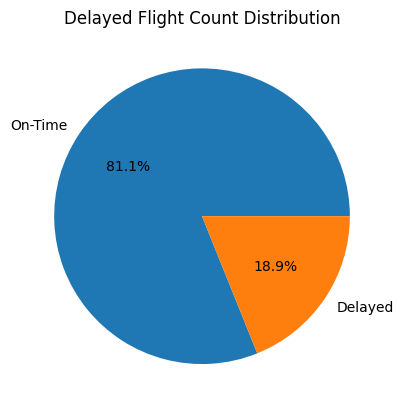

In [49]:
# Visualize percentages of target variable, which is DEP_DEL15
class_labels = {0: 'On-Time', 1: 'Delayed'}
counts = df['DEP_DEL15'].value_counts()
plt.pie(counts, labels=counts.index.map(class_labels), autopct='%1.1f%%')
plt.title('Delayed Flight Count Distribution')
plt.show()

Takeaways from Above
- This percentage indicates that this dataset is a good representation of 
overall flights, as the historical delay percentage in the U.S. is around 20% 
according to this report from [AFAR](https://www.afar.com/magazine/how-many-flights-get-canceled-on-average-each-day#:~:text=%E2%80%9CIt%20is%20'normal'%20to,roughly%20250%20canceled%20flights%20nationwide.).
- However, there is a major inbalance towards on-time flights compared to those
that are delayed that could affect the model.
- In this project, predicting an on-time flight to be delayed is better than 
predicting a delayed flight will be able to depart on-time.

### Analysis of Features

The goal of this section is to analyze the distribution of all of the features
and see how delay percentage changes based off of that feature.

This section is later broken down into 2 sub-sections, `Categorical` and 
`Numerical`, where we analyze the 2 types of variables.

We'll start off by looking at correlations between the features through a heat
map and a top correlation list to see which features are highly correlated 
together. This will be useful later when we dimension reduction and open the door
for algorithms that have problems with feature that have high-colinearity.

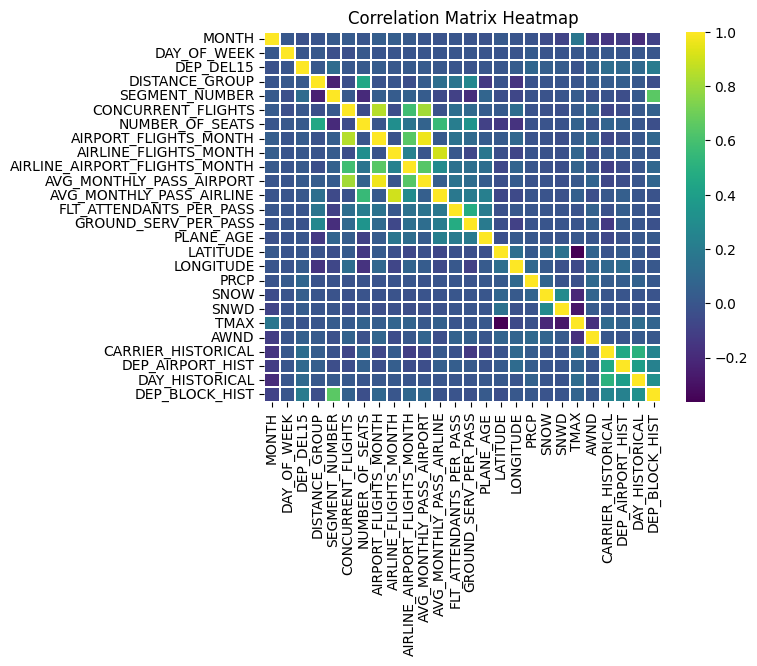

In [50]:
# Create the Heatmap of Correlations
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False, cmap='viridis', fmt='.1%',
            linewidths=0.01,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.index)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [51]:
# Retrieve DataFrame of Top Correlations with a Threshold of 0.9
corr_unstacked = corr_matrix.unstack()
corr_unstacked = corr_unstacked[corr_unstacked != 1]
sorted_corr = corr_unstacked.reindex(corr_unstacked.abs().sort_values(\
    ascending=False).index)
sorted_corr[sorted_corr.abs() >= 0.9]

AIRPORT_FLIGHTS_MONTH     AVG_MONTHLY_PASS_AIRPORT    0.967829
AVG_MONTHLY_PASS_AIRPORT  AIRPORT_FLIGHTS_MONTH       0.967829
AIRLINE_FLIGHTS_MONTH     AVG_MONTHLY_PASS_AIRLINE    0.902803
AVG_MONTHLY_PASS_AIRLINE  AIRLINE_FLIGHTS_MONTH       0.902803
dtype: float64

Inferences from Above
- Average passengers (`AVG_MONTHLY_PASS_AIRPORT`) and average flights 
(`AIRPORT_FLIGHTS_MONTH`) in the departing airport per month are highly 
correlated. 
  - This logically makes sense, as the more flights the airport has, the more 
passenegers it serves.
- Same applies to airlines: `AVG_MONTHLY_PASS_AIRLINE` and 
`AIRLINE_FLIGHTS_MONTH`

#### Analysis of Categorical Variables

This section analyzes the distribution of all of the categorical features. I'm 
considering month, day of the week, distance group, and segment number as 
categorical since they're discrete values rather than continous.

I'll start off by examining how 
the feature is distributed and how flight delay perecentage change based off of
changes in the feature through bar charts. This will help me detect 
imbalances in the dataset and see any patterns with the target variable.

In [52]:
# Helper Function to Add Labels to Bars in Bar Charts
def add_labels(axes, num):
    for p in axes[num].patches:
        height = p.get_height()
        if height < 1.0:
            height = round(height, 2)
        else:
            height = int(height)
        axes[num].annotate(height, (p.get_x() + p.get_width() / 2., p.get_height()/3), 
            ha = 'center', 
            va = 'center', 
            xytext = (0, 9), textcoords = 'offset points'
        )

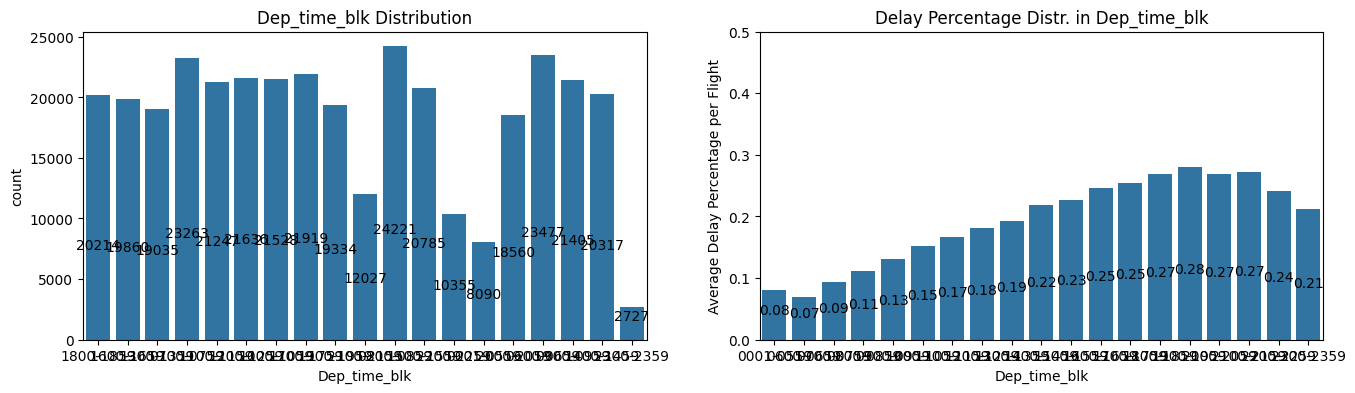

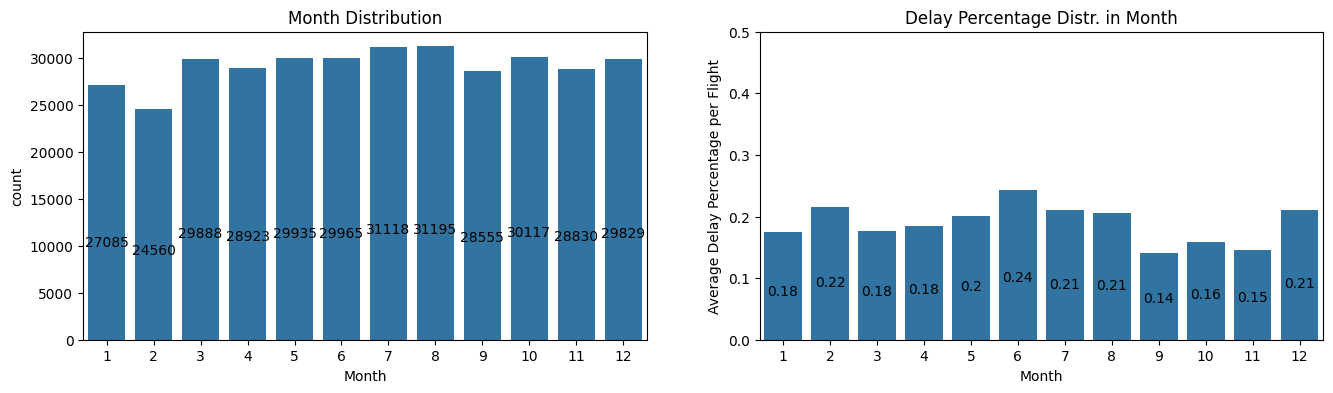

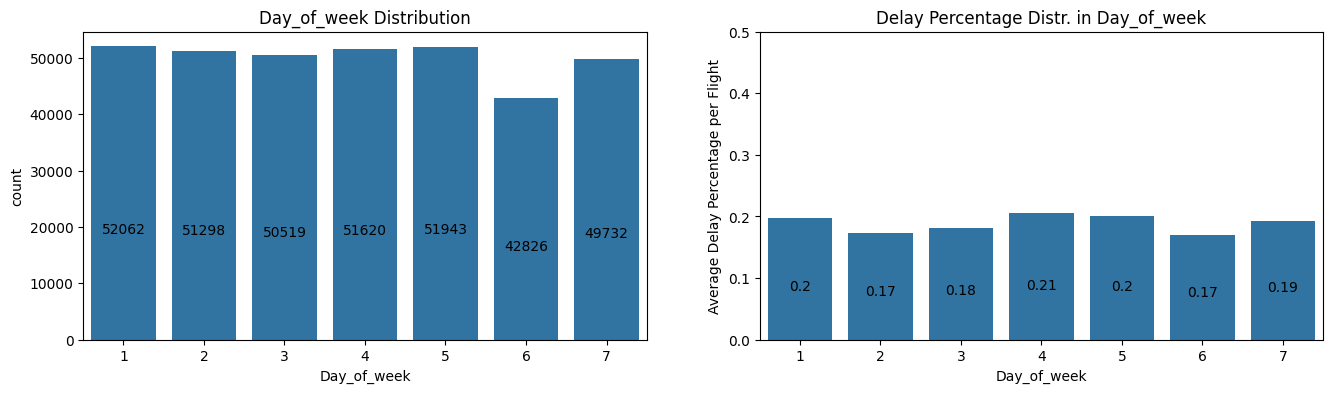

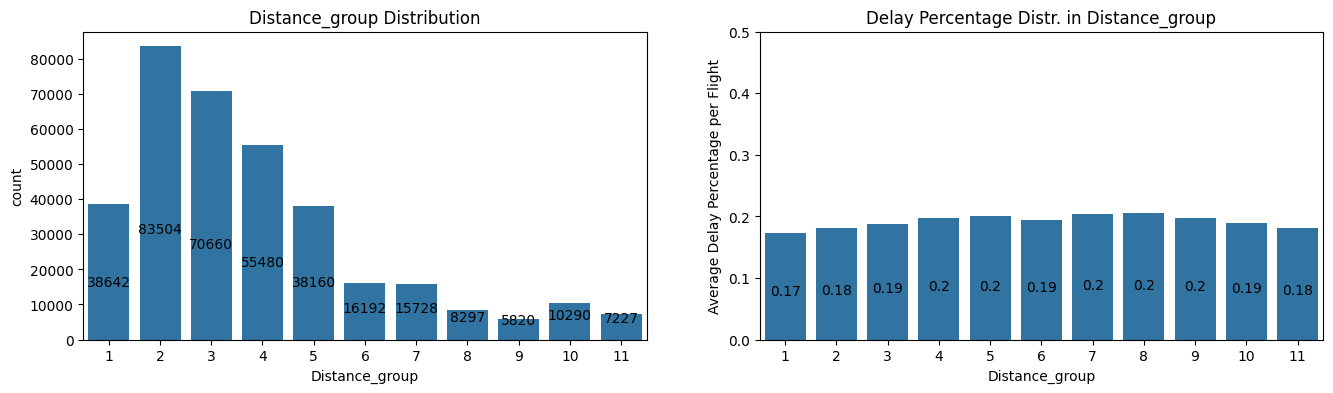

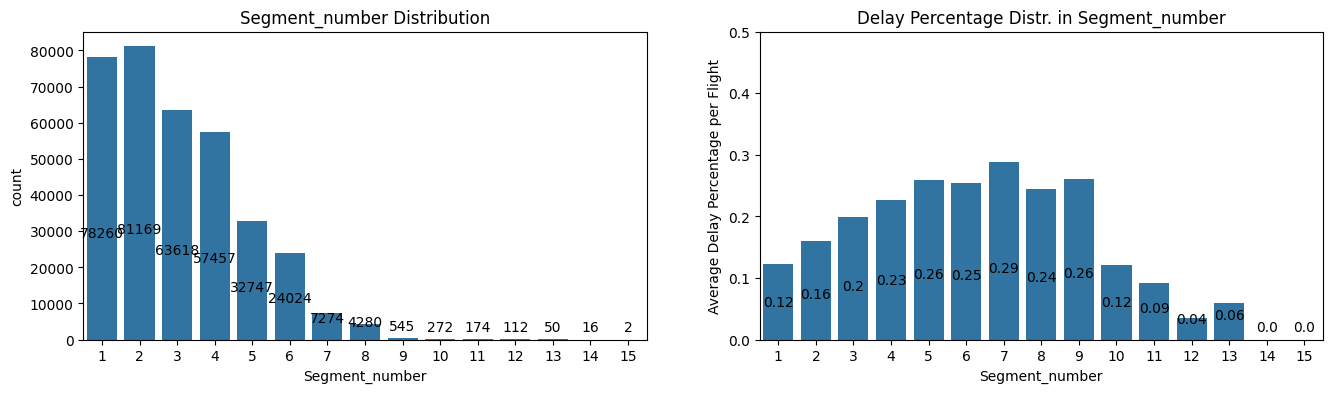

In [53]:
# Visualize Distributions of Categorical Variables
categorical = ['DEP_TIME_BLK', 'MONTH', 'DAY_OF_WEEK', 'DISTANCE_GROUP', 
               'SEGMENT_NUMBER']

for column in categorical:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

    # Figure #1: Bar Chart of the Categorical Feature Counts
    sns.countplot(x=column, data=df, ax=axes[0])
    axes[0].set_xlabel(column.capitalize())
    axes[0].set_title(f"{column.capitalize()} Distribution")
    add_labels(axes, 0)

    # Compute the percentage of 1s in the binary variable for each category
    category_percent = df.groupby(column)['DEP_DEL15'].mean()
    
    # Figure #2: Bar Chart of the Categrocial Feature vs Delay Percentage
    sns.barplot(x=category_percent.index, y=category_percent.values, ax=axes[1])
    axes[1].set_xlabel(column.capitalize())
    axes[1].set_ylabel("Average Delay Percentage per Flight")
    axes[1].set_ylim(0, 0.5)
    axes[1].set_title(f"Delay Percentage Distr. in {column.capitalize()}")
    add_labels(axes, 1)

plt.show()

Inferences from Above
- Departure time blocks seem to have a very high influence on delay percentage.
As mentioned earlier, by breaking it down into three features, I can look closer
at the data to see which part of the block is influencing delay percentage the 
most.
- Distance groups and segment numbers are heavily skewed right, which can pose a
problem later for algorithm that assumes gaussian distribution of count.
- Airplanes in the middle of their segment have the highest delay percentages
than those who are on the first or last few segments.
- None of the remaining features seem to have much of an impact on delay percentage.

Now, I'll look into airlines. Since there are too many different airline, 
I'm going to look into their delay percentages in this dataset from a table.

In [54]:
# See each individual airline's delay perecentages
airline_percentages = df.groupby('CARRIER_NAME')['DEP_DEL15'].mean()
airline_percentages.columns = ['Airline', 'Delay Percentage']
airline_percentages.sort_values(ascending=False)

CARRIER_NAME
Frontier Airlines Inc.          0.259033
JetBlue Airways                 0.252106
Atlantic Southeast Airlines     0.228194
Southwest Airlines Co.          0.209013
American Airlines Inc.          0.203481
Spirit Air Lines                0.194988
Comair Inc.                     0.194169
United Air Lines Inc.           0.194098
Mesa Airlines Inc.              0.186090
American Eagle Airlines Inc.    0.177572
SkyWest Airlines Inc.           0.177479
Allegiant Air                   0.177352
Endeavor Air Inc.               0.173988
Alaska Airlines Inc.            0.167295
Midwest Airline, Inc.           0.160458
Delta Air Lines Inc.            0.149120
Hawaiian Airlines Inc.          0.077565
Name: DEP_DEL15, dtype: float64

Inferences from Above
- The airline of the flight have very diverse delay perecentages.
- It appears some airlines, like Hawaiian Airlines Inc., prioritize the flight
not being delayed, while others are known for constant delays, like Frontier
Airlines.

Now I'll look into airports data, which is stored in two features:
`DEPARTING_AIRPORT` and `PREVIOUS_AIRPORT`.

In [55]:
print(f"# of Departing Airports: {df['DEPARTING_AIRPORT'].nunique()}")
print(df['DEPARTING_AIRPORT'].value_counts()[:20])

# of Departing Airports: 96
DEPARTING_AIRPORT
Atlanta Municipal                    21205
Chicago O'Hare International         17818
Dallas Fort Worth Regional           15810
Stapleton International              13289
Douglas Municipal                    12392
Los Angeles International            11702
Houston Intercontinental              9647
Phoenix Sky Harbor International      9177
LaGuardia                             9004
San Francisco International           8989
McCarran International                8849
Detroit Metro Wayne County            8819
Minneapolis-St Paul International     8585
Logan International                   7761
Orlando International                 7668
Seattle International                 7545
Ronald Reagan Washington National     7305
Newark Liberty International          7253
John F. Kennedy International         6747
Philadelphia International            6407
Name: count, dtype: int64


In [56]:
print(f"# of Previous Airports: {df['PREVIOUS_AIRPORT'].nunique()}")
print(df['PREVIOUS_AIRPORT'].value_counts()[:20])

# of Previous Airports: 351
PREVIOUS_AIRPORT
NONE                                 78260
Atlanta Municipal                    11093
Chicago O'Hare International          9640
Stapleton International               7444
Dallas Fort Worth Regional            7238
Los Angeles International             6920
Douglas Municipal                     6896
LaGuardia                             6487
Logan International                   6352
Phoenix Sky Harbor International      5874
McCarran International                5688
San Francisco International           5425
Detroit Metro Wayne County            5331
Orlando International                 5239
Ronald Reagan Washington National     5064
Houston Intercontinental              5047
Seattle International                 4999
Newark Liberty International          4850
Minneapolis-St Paul International     4798
John F. Kennedy International         4552
Name: count, dtype: int64


Takeaways from Above
- There are a lot of distinct airports in this dataset
- The same airports are near the highest of the list.

Since there's too many distinct airports and we can see airport's delay 
percentages through `DEP_AIRPORT_HIST` and business from 
`AVG_MONTHLY_PASS_AIRPORT`, the individual airport name isn't as useful. The 
other two metrics about airport data tell us more information about the airport
that is more relevant than the name. Same logic applies to the airlines. These 
variables are strings and not numbers with a high cardinality, making it hard to
encode. Therefore, we can remove the departing, arriving airports, and airline. 

#### Numerical Features
This section analyzes the distribution of all of the numerical features. Since
there are a surplus of numerical features, I'm going to split it into groups
based on what the feature is trying to capture to see if the general area is 
making an impact on delay percentage. 

The groups will be the following:
1. Airport Features
2. Flight Features
3. Weather Features
4. Historical Features

In each group, I'll see how the features are distributed, how delay perecntage 
changed based off of changes in the features, and how many outliers are there 
through a histogram, color mesh, and box plot respectively. This will allow me 
to detect any imbalances in any of the features and give me insight on future 
feature engineering.

##### Airport Features
The first group I'm analyzing thoroughly is airport information at the flight's
departure time. This includes # of concurrent flights, 

In [57]:
airport_features = ['CONCURRENT_FLIGHTS', 'AIRPORT_FLIGHTS_MONTH', 
                    'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
                    'LATITUDE', 'LONGITUDE']

In [58]:
# Display Descriptive Statistics of Each Airport Feature
df[airport_features].describe()

,CONCURRENT_FLIGHTS,AIRPORT_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,LATITUDE,LONGITUDE
count,350000.000000,350000.000000,350000.000000,3.500000e+05,350000.000000,350000.000000
mean,27.840954,12674.084789,3448.282717,1.588221e+06,36.706599,-94.228190
std,21.529376,8837.073676,4241.005729,1.123843e+06,5.511073,17.911443
min,1.000000,1100.000000,1.000000,7.047600e+04,18.440000,-159.346000
25%,11.000000,5345.000000,653.000000,6.732210e+05,33.436000,-106.377000
50%,23.000000,11562.000000,2240.000000,1.486066e+06,37.505000,-87.906000
75%,39.000000,17615.000000,4798.000000,2.006675e+06,40.779000,-80.936000
max,109.000000,35256.000000,21837.000000,4.365661e+06,61.169000,-66.002000


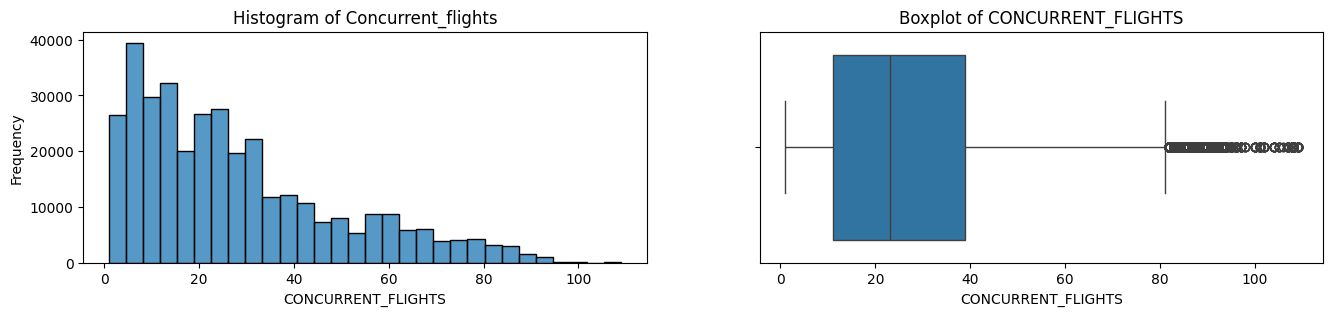

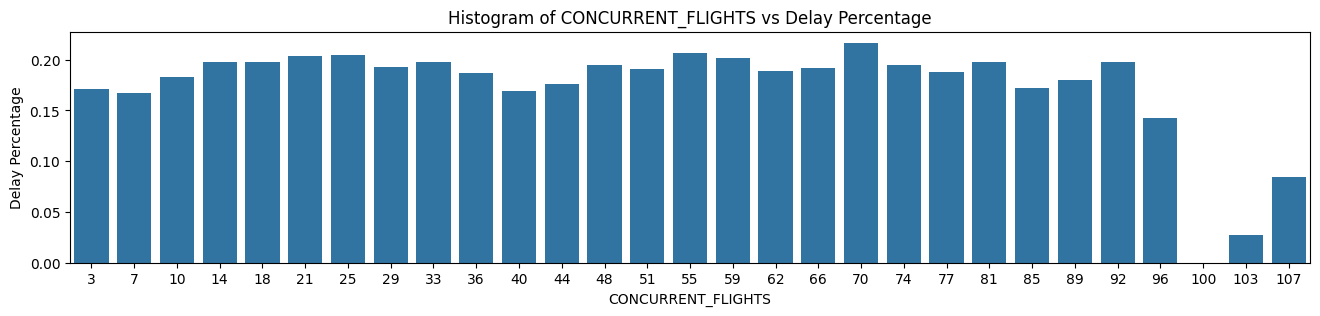

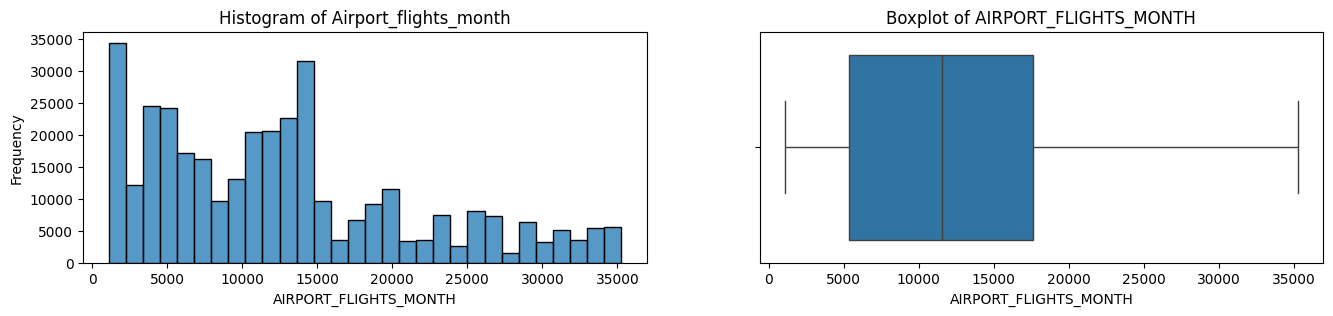

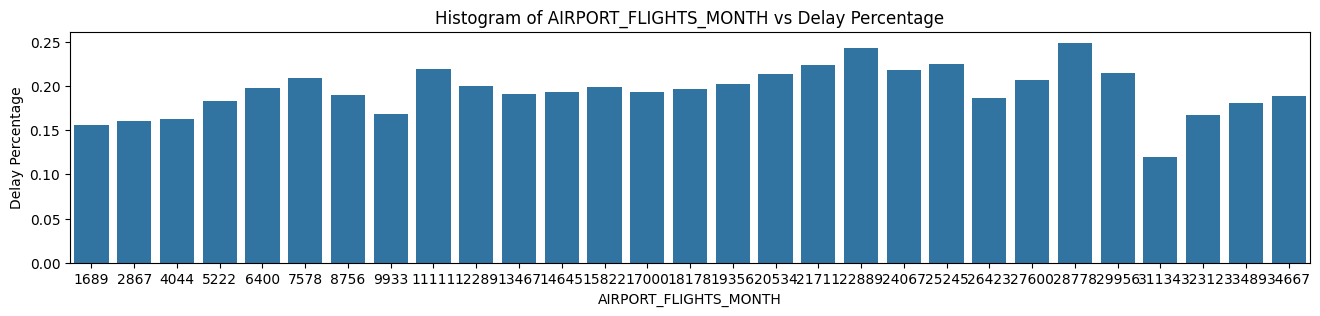

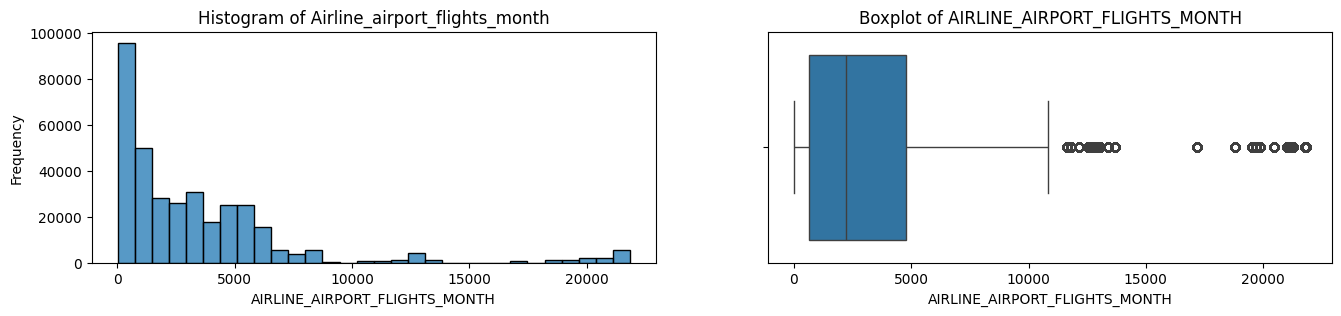

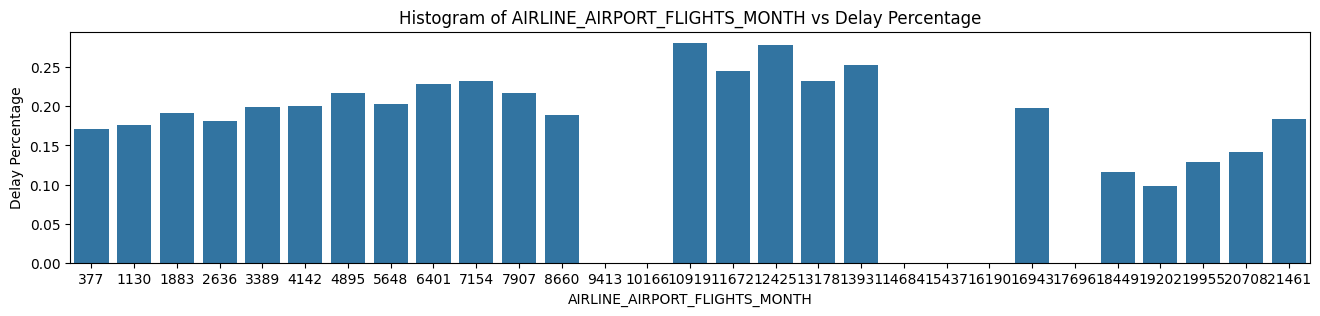

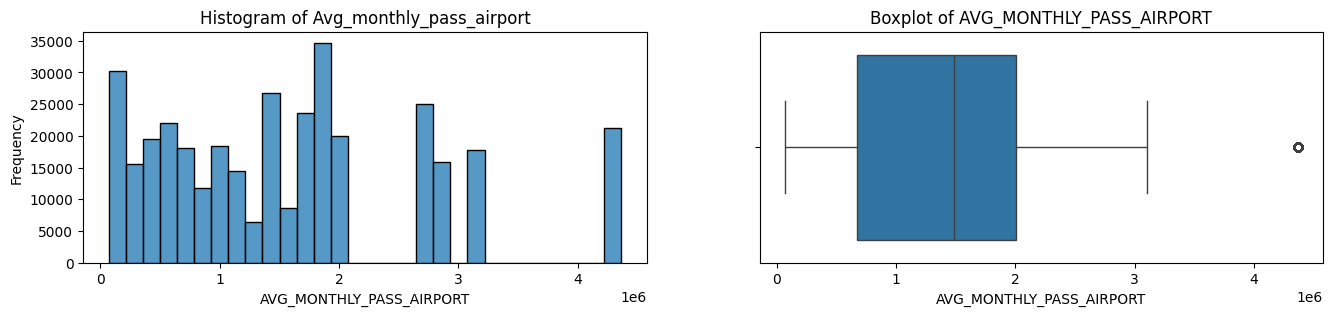

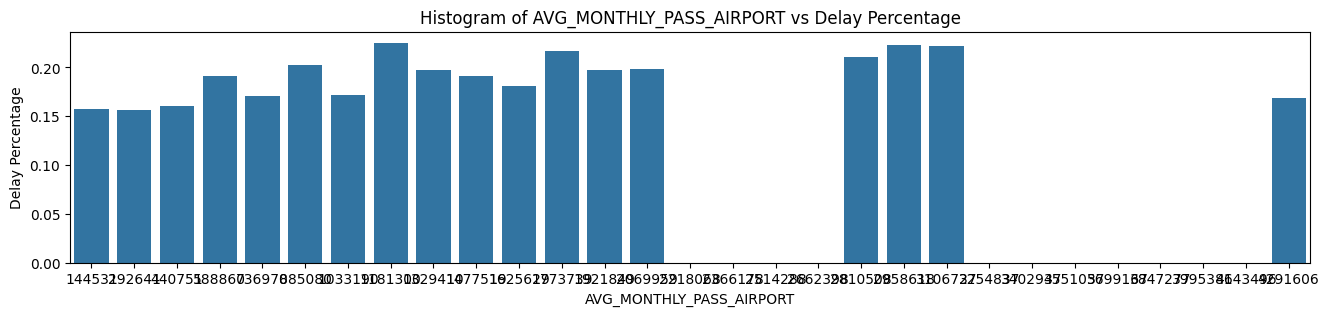

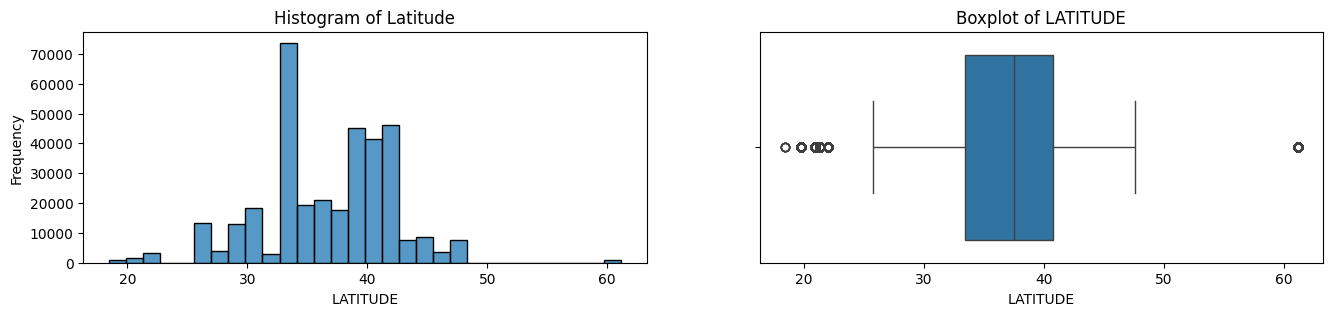

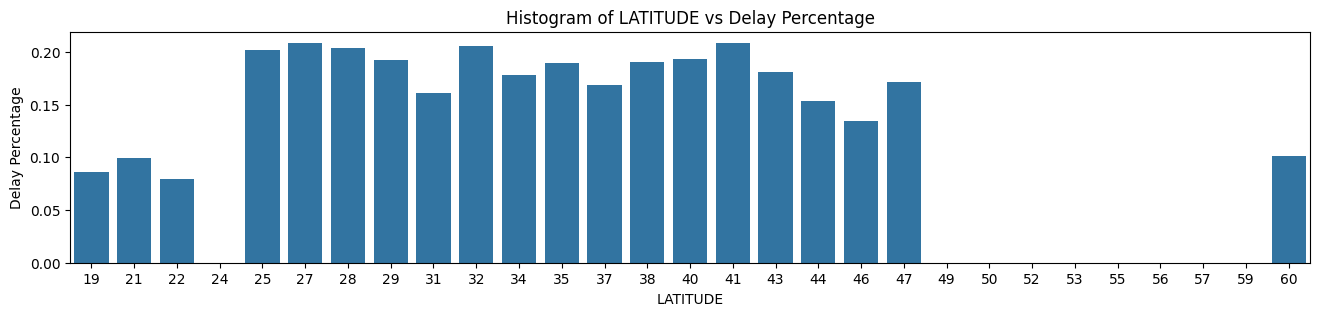

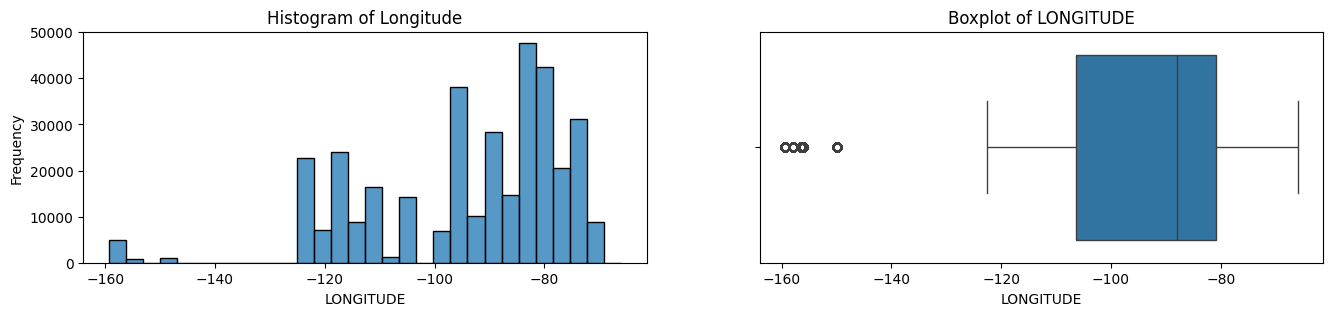

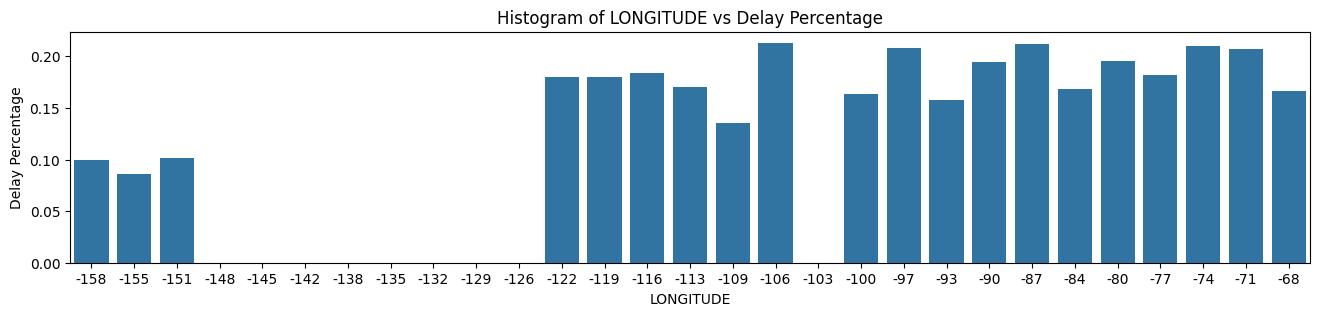

In [59]:
# Visualize the Distrubutions of Numerical Variables
for column in airport_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 3))
    
    # Figure #1: Bar plot of percentage of 1s in each bin
    sns.histplot(data=df, x=column, bins=30, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    axes[0].set_title(f"Histogram of {column.capitalize()}")

    # Figure #2: Boxplot of Numerical Feature
    sns.boxplot(data=df, x=column, ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")
    plt.show()

    # Define bins for the x-axis
    x_bins = np.linspace(df[column].min(), df[column].max(), 30)
    bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()
    bin_summary[column] = bin_summary[column].apply(lambda x: round(x.mid))
    
    # Figure #3: Histogram
    plt.figure(figsize=(16,3))
    sns.barplot(data=bin_summary, x=column, y='DEP_DEL15')
    plt.title(f"Histogram of {column} vs Delay Percentage")
    plt.ylabel(f"Delay Percentage")
    plt.show()

Takeaways from Above
- Concurrent Flights is skewed right.
- There are some outliers in `longitude` and `latitude`, where Western 
and Southern airports seem to have a lower delay percentage than the others.
- The remaining airport features does't seem to have much of an impact on delay
percentage.
  - One possible explanation is that airports who handle more flights have 
  scaled their operations to ensure there won't be more delays than before.


##### Flight Features
Next, I'm going to look into the flight features, include airline features.

In [60]:
flight_features = ['NUMBER_OF_SEATS', 'AIRLINE_FLIGHTS_MONTH', 
                   'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 
                   'PLANE_AGE']

In [61]:
# Display Descriptive Statistics of Each Flight's Feature
df[flight_features].describe()

,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE
count,350000.000000,350000.000000,350000.000000,350000.000000,350000.000000
mean,133.668257,62742.742557,0.000097,0.000136,11.514626
std,46.585293,34370.727998,0.000087,0.000047,6.941142
min,44.000000,5582.000000,0.000000,0.000007,0.000000
25%,90.000000,24966.000000,0.000034,0.000099,5.000000
50%,143.000000,70473.000000,0.000062,0.000125,12.000000
75%,172.000000,85579.000000,0.000144,0.000177,17.000000
max,337.000000,117728.000000,0.000348,0.000229,32.000000


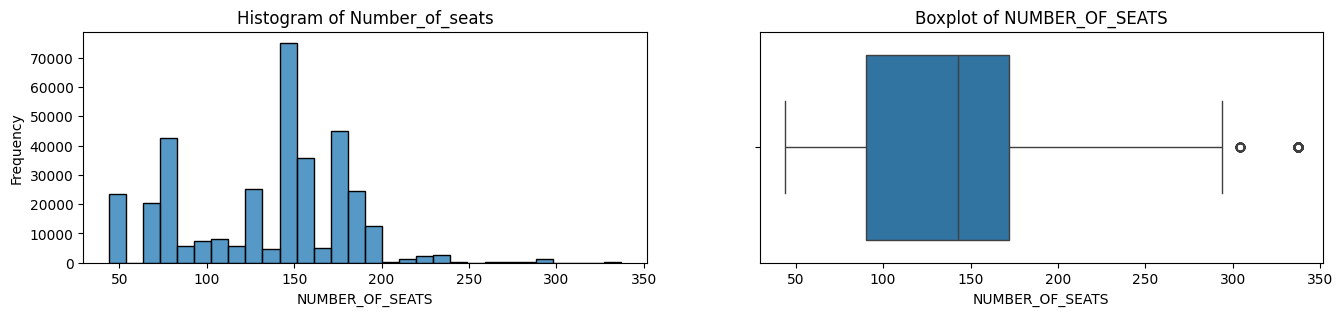

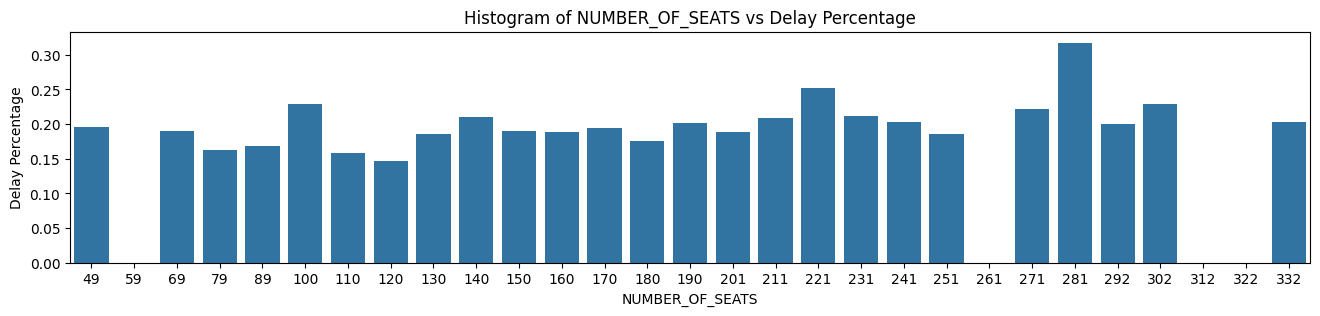

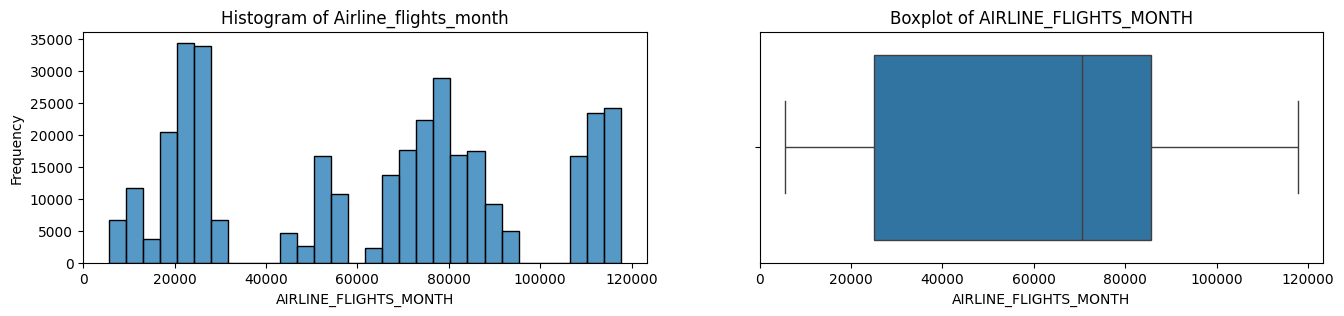

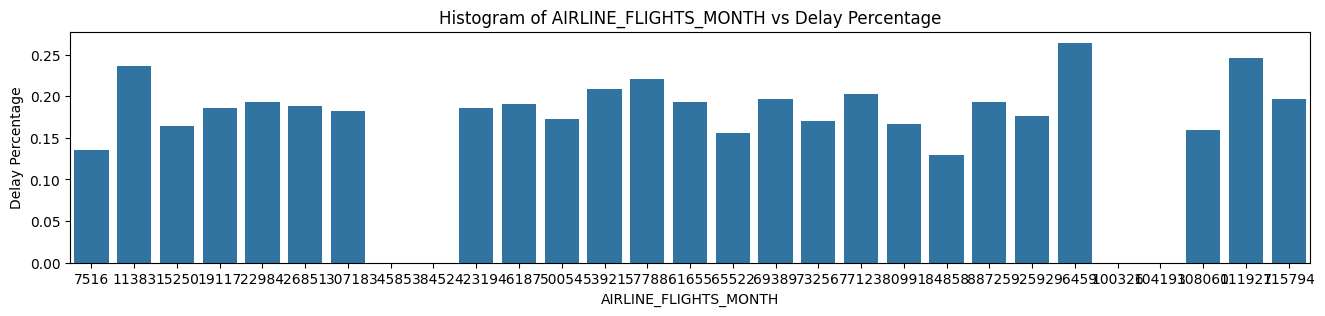

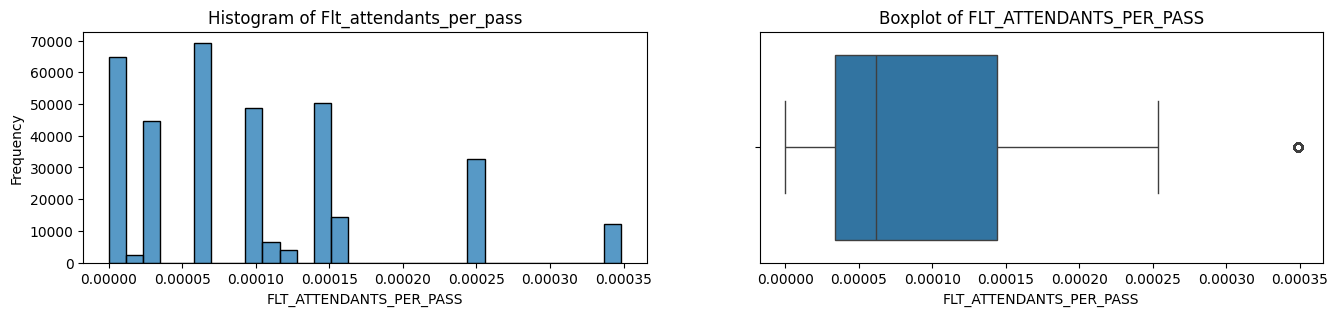

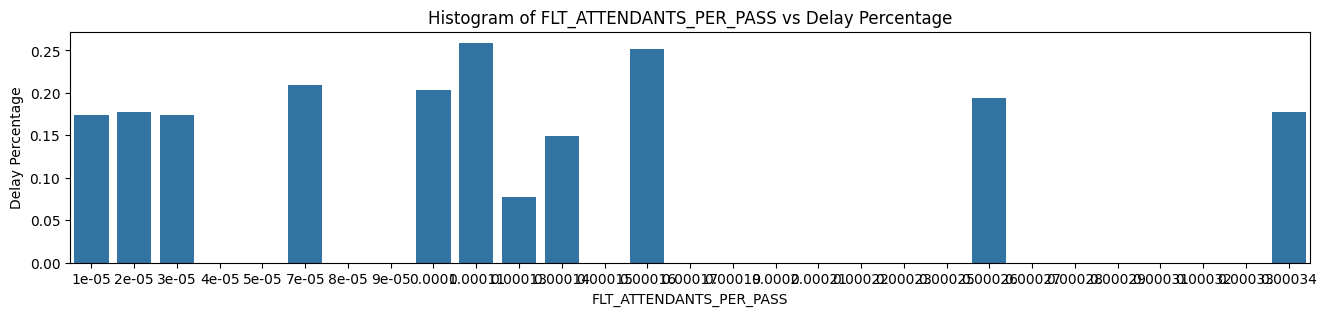

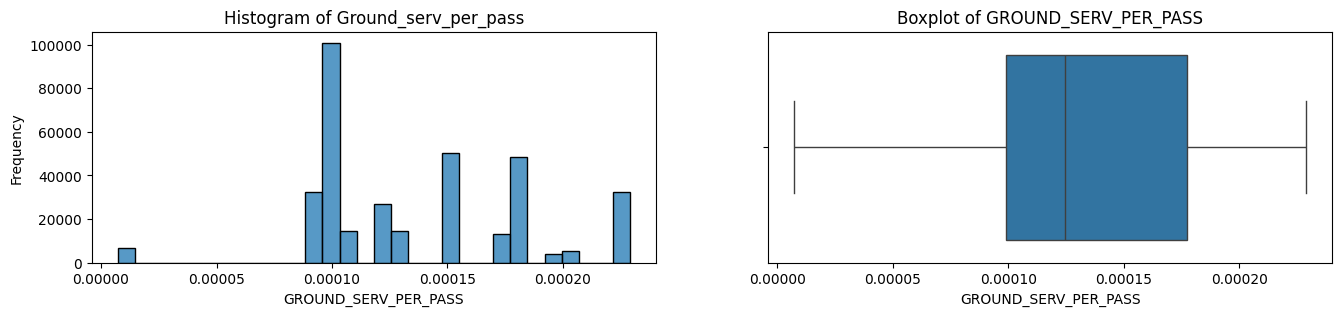

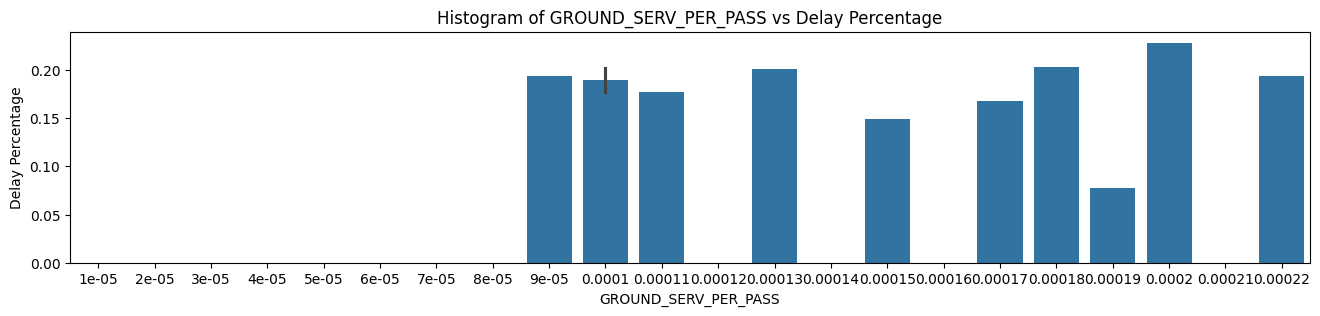

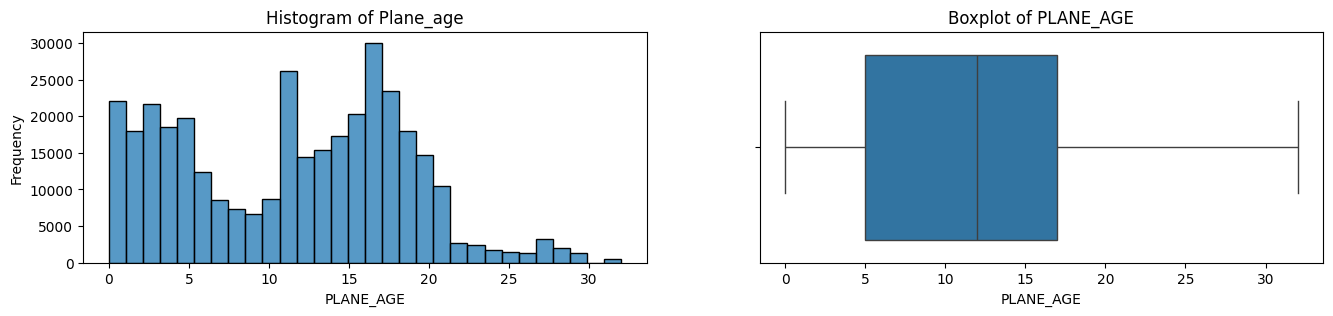

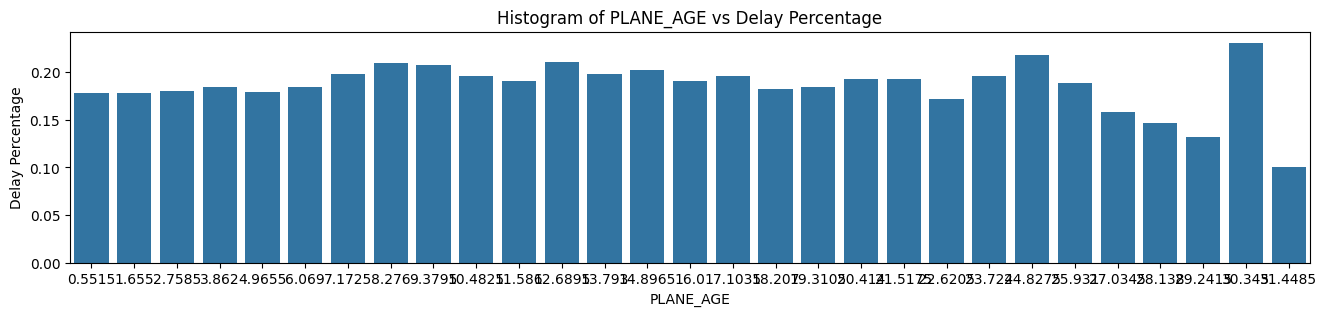

In [62]:
# Visualize Distributions of Historical Features with Count and Delay %
for column in flight_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 3))
    
    # Figure #1: Bar plot of percentage of 1s in each bin
    sns.histplot(data=df, x=column, bins=30, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    axes[0].set_title(f"Histogram of {column.capitalize()}")

    # Figure #2: Boxplot of Numerical Feature
    sns.boxplot(data=df, x=column, ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")
    plt.show()

    # Define bins for the x-axis
    x_bins = np.linspace(df[column].min(), df[column].max(), 30)
    bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()
    if df[column].min() < 1:
        bin_summary[column] = bin_summary[column].apply(lambda x: round(x.mid,5))
    else:
        bin_summary[column] = bin_summary[column].apply(lambda x: round(x.mid))
    
    # Figure #3: Histogram
    plt.figure(figsize=(16,3))
    sns.barplot(data=bin_summary, x=column, y='DEP_DEL15')
    plt.title(f"Histogram of {column} vs Delay Percentage")
    plt.ylabel(f"Delay Percentage")
    plt.show()

Takeaways from Above
- There are some outliers with high `NUMBER_OF_SEATS` or high 
`FLT_ATTENDANTS_PER_PASS`.
- `FLT_ATTENDANTS_PER_PAS` and `GROUND_SERV_PER_PASS` have really small scales,
which could influnece the model to assign lower weights than it should be. 
-  Flights with high `PLANE_AGE` have lower delay percentage than newer planes.
However, this could be due to the data imbalance in that feature.
- No plane feature seem to play a huge factor in delay percentages.

##### Weather Features

Next, I'm going to look into the impact of weather on delay percentage.

In [63]:
weather = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']

In [64]:
# Display Descriptive Statistics of Each Weather Feature
df[weather].describe()

,PRCP,SNOW,SNWD,TMAX,AWND
count,350000.000000,350000.000000,350000.000000,350000.000000,350000.000000
mean,0.103549,0.031814,0.093478,71.427713,8.342067
std,0.339433,0.315082,0.741731,18.386299,3.607005
min,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,0.000000,0.000000,0.000000,59.000000,5.820000
50%,0.000000,0.000000,0.000000,74.000000,7.830000
75%,0.020000,0.000000,0.000000,86.000000,10.290000
max,11.630000,17.200000,25.200000,115.000000,33.780000


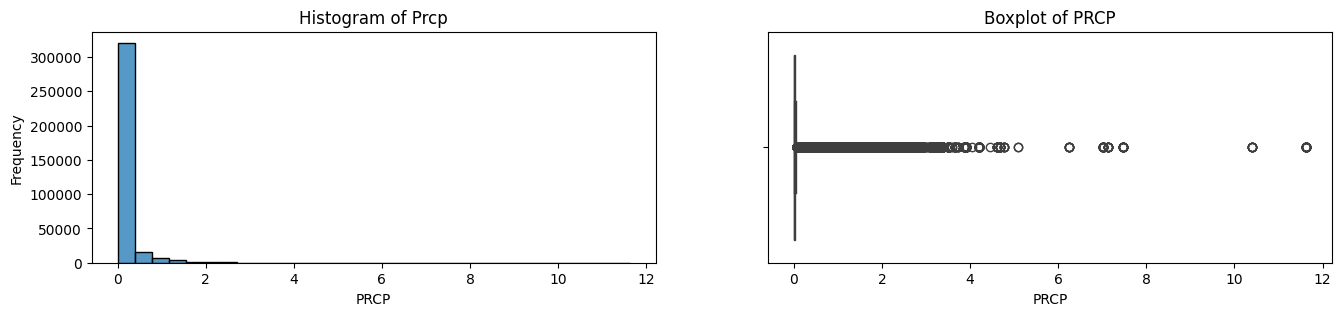

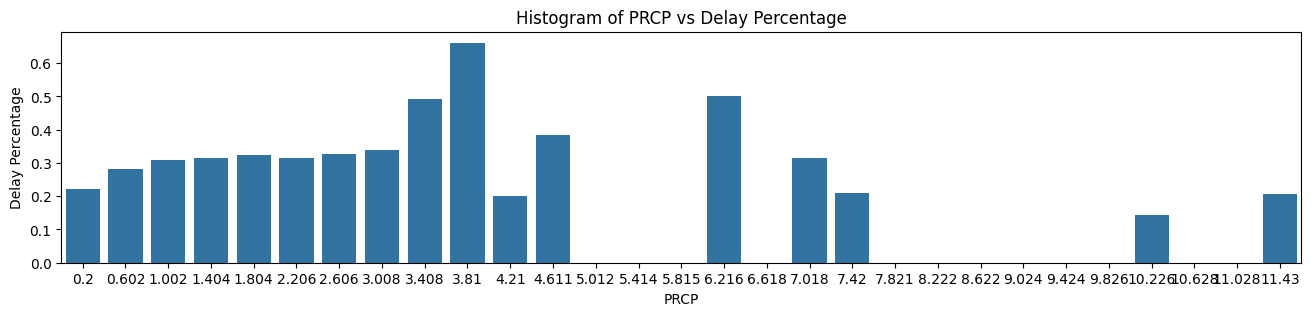

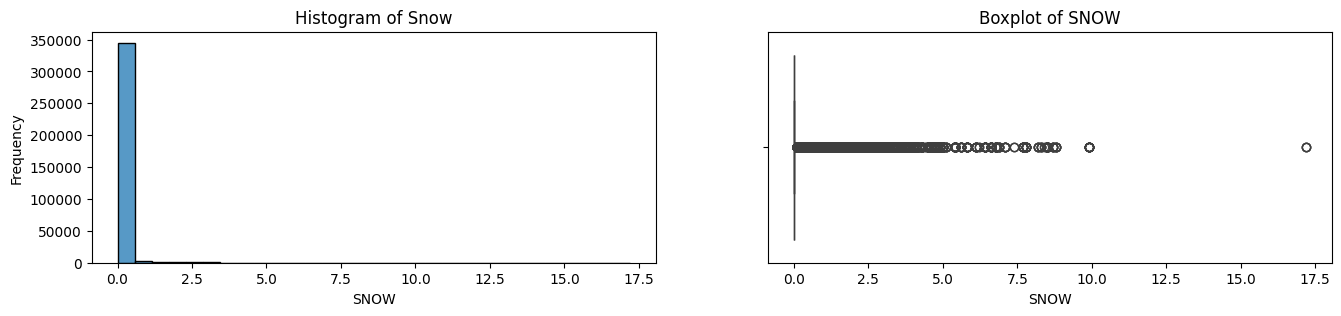

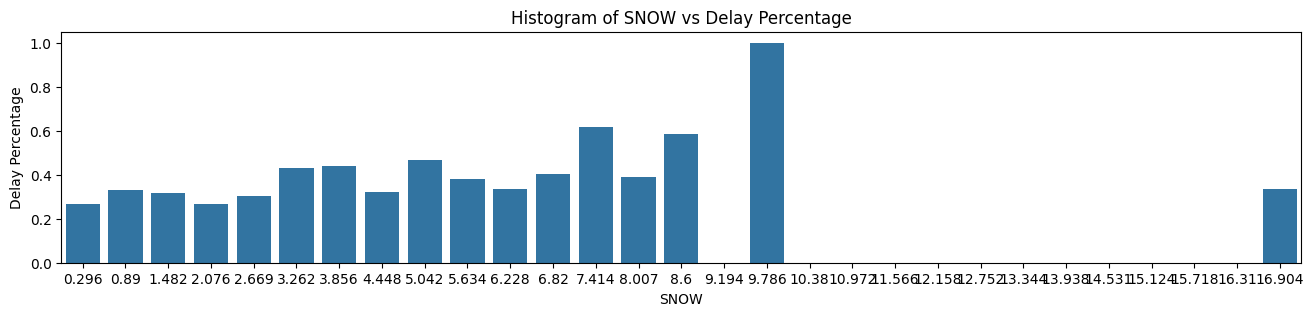

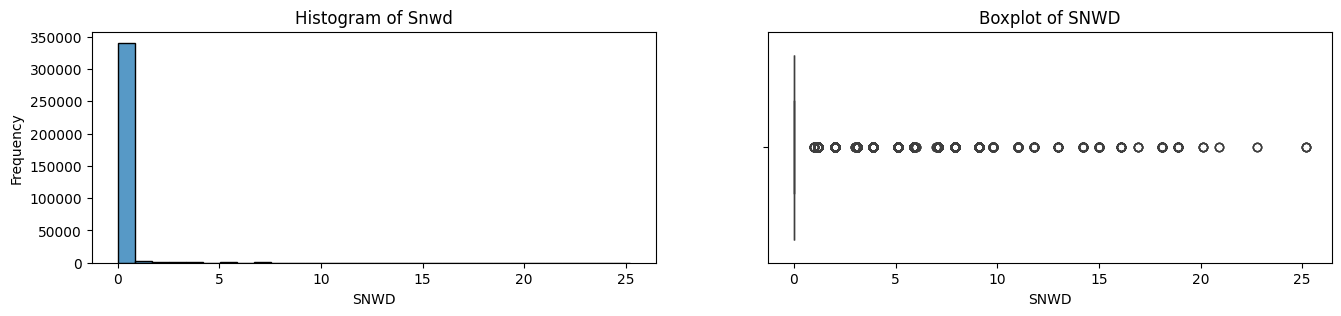

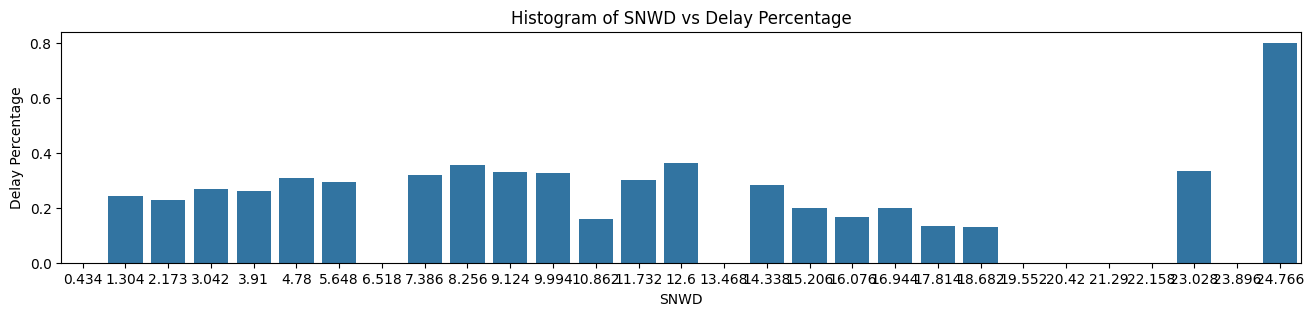

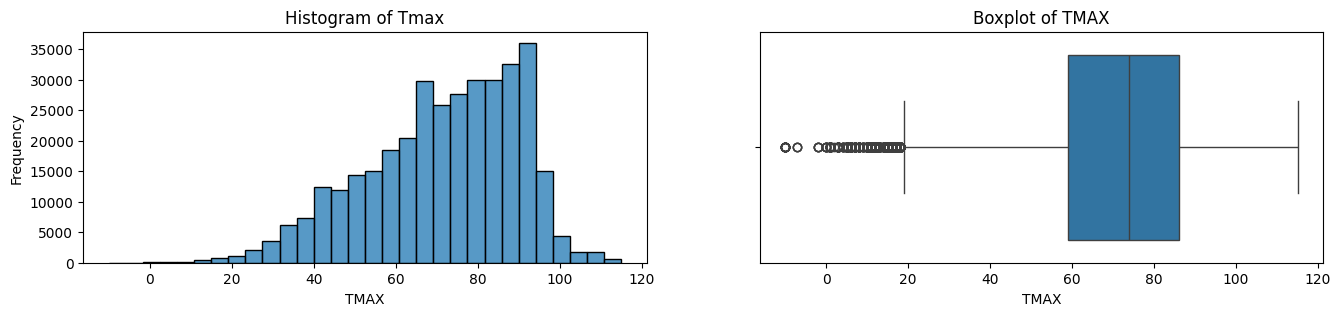

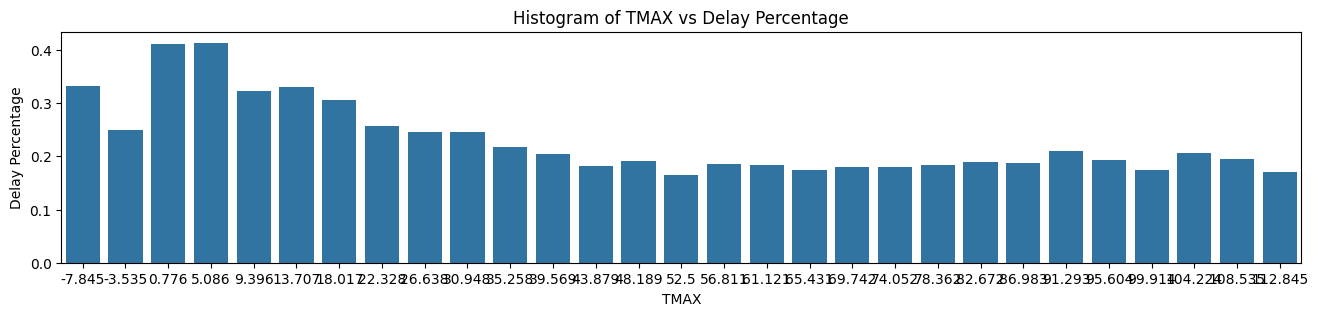

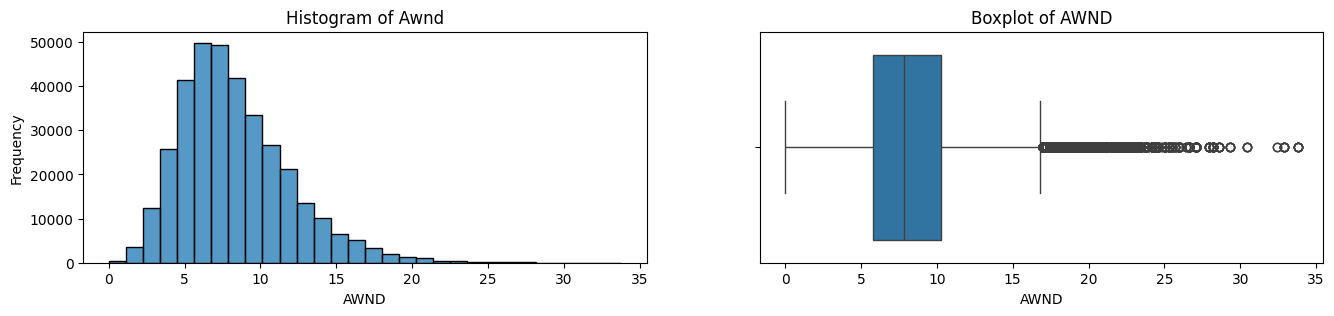

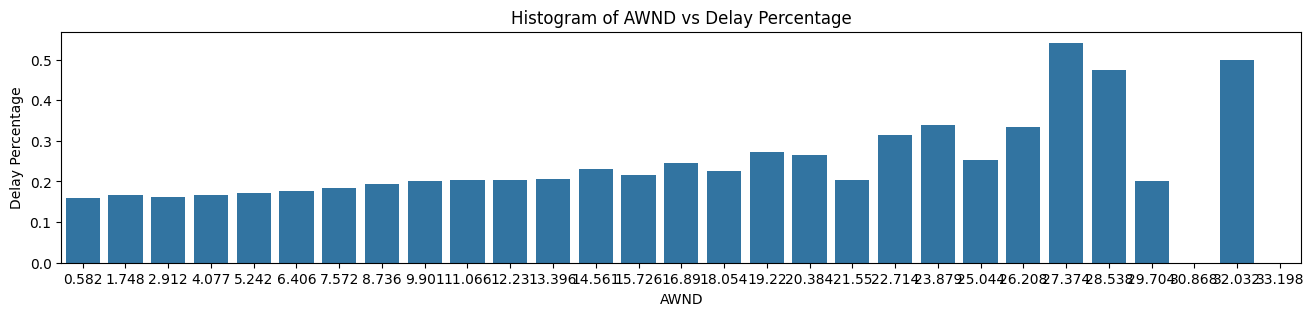

In [65]:
# Visualize Distributions of Historical Features with Count and Delay %
for column in weather:
    fig, axes = plt.subplots(1, 2, figsize=(16, 3))
    
    # Figure #1: Bar plot of percentage of 1s in each bin
    sns.histplot(data=df, x=column, bins=30, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    axes[0].set_title(f"Histogram of {column.capitalize()}")

    # Figure #2: Boxplot of Numerical Feature
    sns.boxplot(data=df, x=column, ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")
    plt.show()

    # Define bins for the x-axis
    x_bins = np.linspace(df[column].min(), df[column].max(), 30)
    bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()
    bin_summary[column] = bin_summary[column].apply(lambda x: round(x.mid, 3))
    
    # Figure #3: Histogram
    plt.figure(figsize=(16,3))
    sns.barplot(data=bin_summary, x=column, y='DEP_DEL15')
    plt.title(f"Histogram of {column} vs Delay Percentage")
    plt.ylabel(f"Delay Percentage")
    plt.show()

Takeaways from Above
- Severe weather can be seen to have a big impact on flight delays, as there
generally seems to be positive correlation between weather features and delay 
percentages.
- Weather variables are severely skewed right and have outliers with high values. 
This makes sense as severe weather is uncommon. This is a form of data imbalance
and I will treat this in my data preprocessing section.

##### Historical Features
Lastly, I'm going to look into the historical features, which include the past delay
percentage in the carrier, airport, day, and departure block.

In [66]:
historical = ['CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
              'DEP_BLOCK_HIST']

In [67]:
# Display Descriptive Statistics of Each Historical Feature
df[historical].describe()

,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
count,350000.000000,350000.000000,350000.000000,350000.000000
mean,0.189137,0.187840,0.189132,0.189087
std,0.047474,0.041550,0.038265,0.077688
min,0.064408,0.043423,0.104450,0.055562
25%,0.154651,0.166740,0.160868,0.127381
50%,0.186516,0.187867,0.191473,0.187484
75%,0.215945,0.202486,0.219939,0.243702
max,0.350235,0.352160,0.270709,0.390600


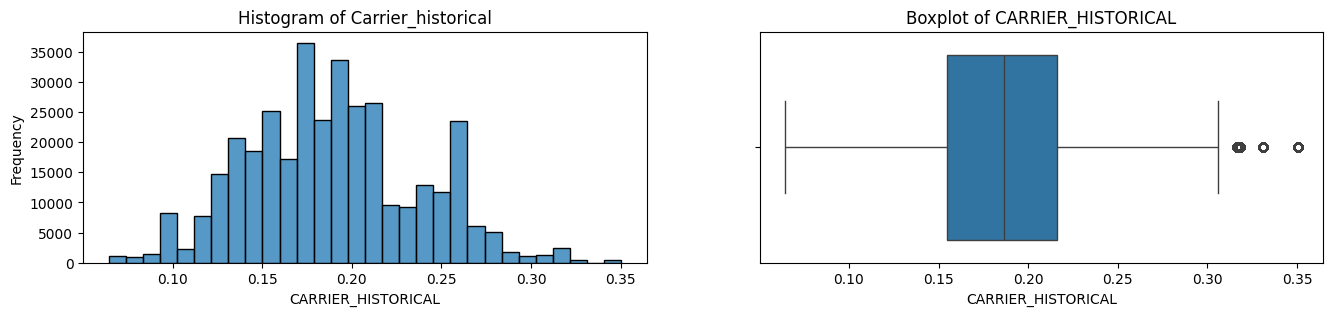

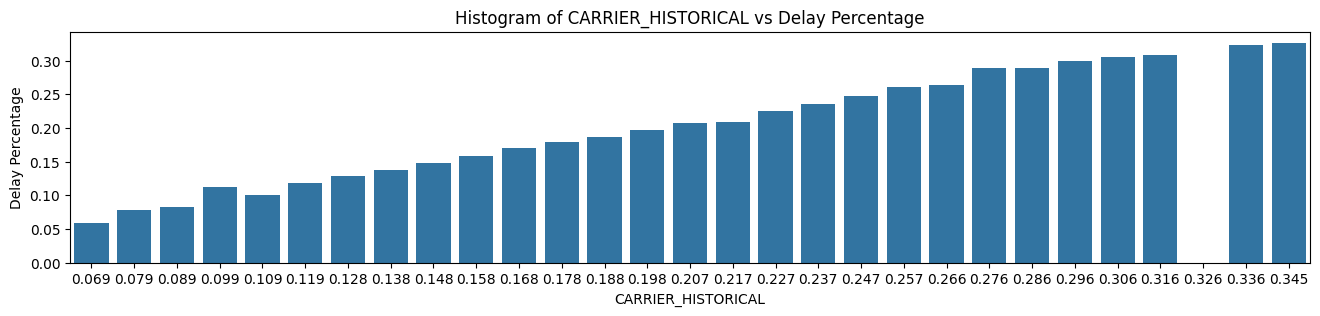

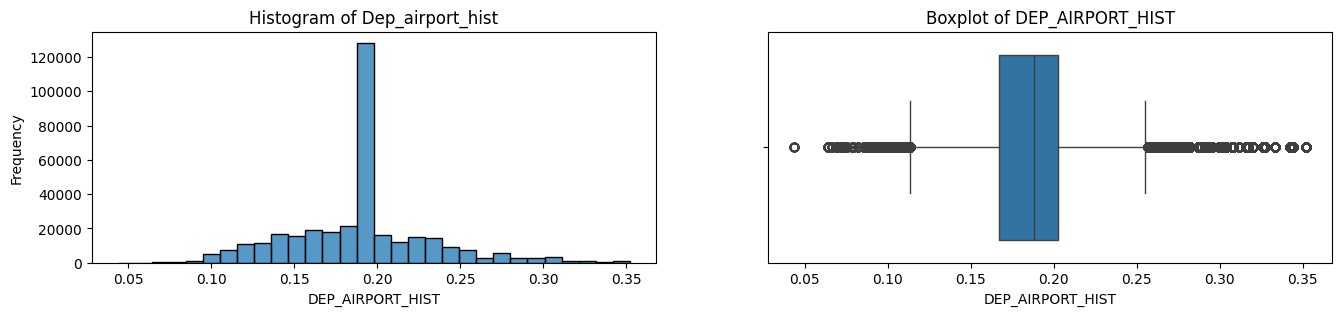

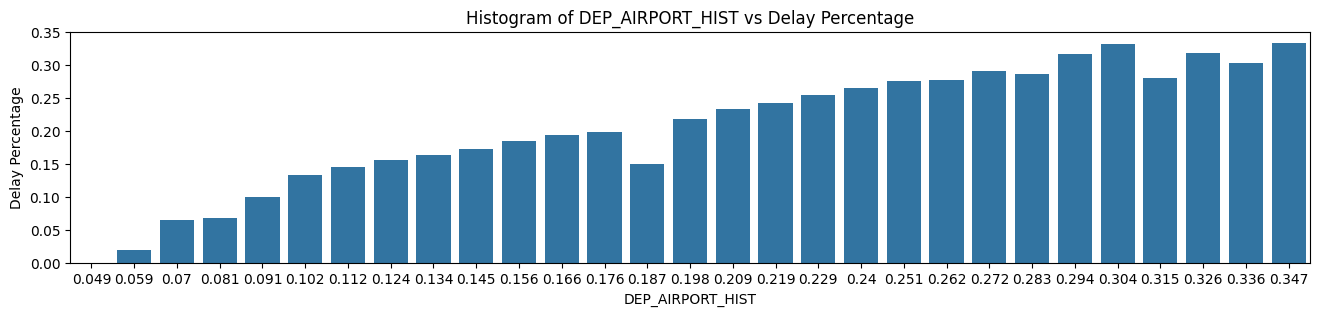

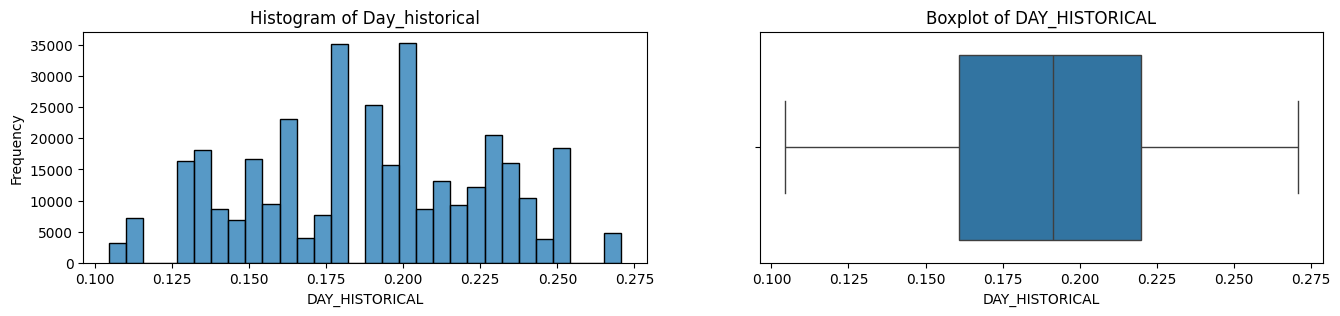

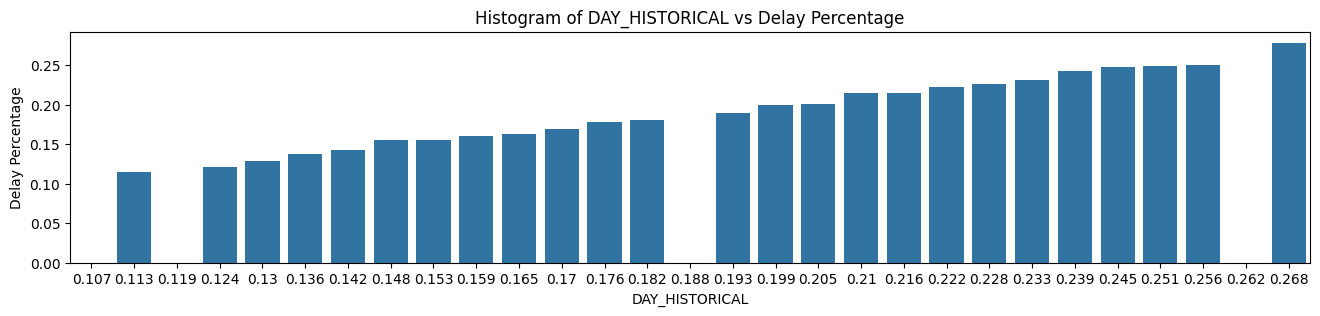

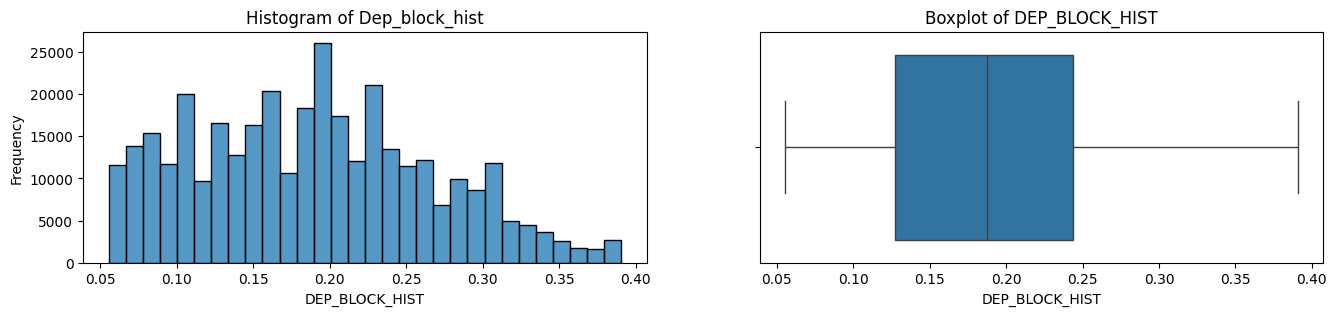

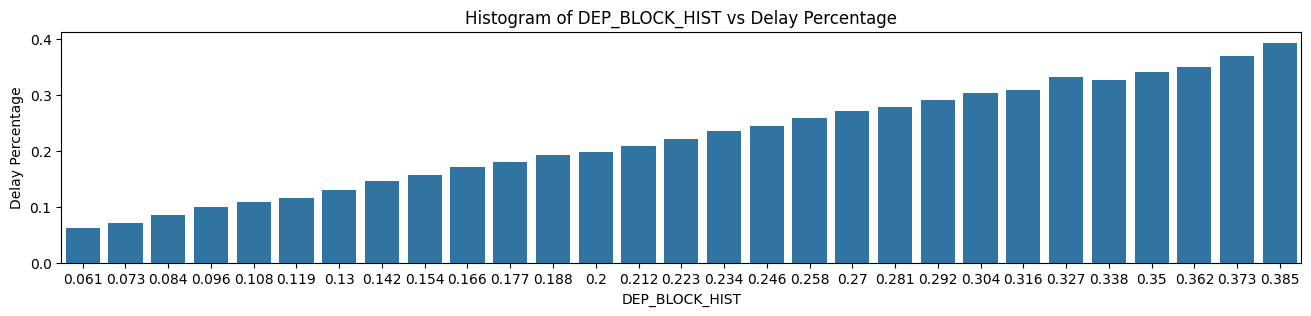

In [68]:
# Visualize Distributions of Historical Features with Count and Delay %
for column in historical:
    fig, axes = plt.subplots(1, 2, figsize=(16, 3))
    
    # Figure #1: Bar plot of percentage of 1s in each bin
    sns.histplot(data=df, x=column, bins=30, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    axes[0].set_title(f"Histogram of {column.capitalize()}")

    # Figure #2: Boxplot of Numerical Feature
    sns.boxplot(data=df, x=column, ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")
    plt.show()

    # Define bins for the x-axis
    x_bins = np.linspace(df[column].min(), df[column].max(), 30)
    bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()
    bin_summary[column] = bin_summary[column].apply(lambda x: round(x.mid, 3))
    
    # Figure #3: Histogram
    plt.figure(figsize=(16,3))
    sns.barplot(data=bin_summary, x=column, y='DEP_DEL15')
    plt.title(f"Histogram of {column} vs Delay Percentage")
    plt.ylabel(f"Delay Percentage")
    plt.show()

Takeaways from Above
- The distribution in all of the historical features are approximately normal.
- They all have a clear positive correlation with current delay percentages 
compared other features.

## Data Preprocessing

I am checking for duplicate flights in the dataset, as we don't want to 
overweight a certain flight that has accidentally been added twice.

In [69]:
# Check for Duplicates
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 104


In [70]:
# Drop Duplicates
df.drop_duplicates(inplace = True)

### Feature Engineering
As mentioned earlier, Departing Time Block (`DEP_TIME_BLK`) is a string with 
various information. On it's own, it represents the time period a flight can 
depart. However, it can rather be broken down into 3 int64 columns that can be
more useful to the model:
  - `START_DEPART`: Starting time of the eligible departure time period
  - `DURATION_BLOCK`: Duration of the eligible departure time period
  - `END_DEPART`: Ending time of the eligible departure time period

In [71]:
# Break down the departure time block into three new features
df[['START_DEPART', 'END_DEPART']] = df['DEP_TIME_BLK'] \
    .str.split('-', expand=True)
df['START_DEPART'] = df['START_DEPART'].apply(lambda x: int(int(x)/100))
df['END_DEPART'] = df['END_DEPART'].apply(lambda x: int(int(x)/100)+1)
df['DURATION_BLOCK'] = df['END_DEPART'] - df['START_DEPART']

# Do same thing to testing datasett
test_df[['START_DEPART', 'END_DEPART']] = test_df['DEP_TIME_BLK'] \
    .str.split('-', expand=True)
test_df['START_DEPART'] = test_df['START_DEPART'].apply(
    lambda x: int(int(x)/100))
test_df['END_DEPART'] = test_df['END_DEPART'].apply(
    lambda x: int(int(x)/100)+1)
test_df['DURATION_BLOCK'] = test_df['END_DEPART'] - test_df['START_DEPART']

# Drop original departure block
df.drop(columns=['DEP_TIME_BLK'], inplace=True)
test_df.drop(columns=['DEP_TIME_BLK'], inplace=True)

# See updated training dataset
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,START_DEPART,END_DEPART,DURATION_BLOCK
0,8,7,0,2,5,12,157,Delta Air Lines Inc.,9144,91062,644,1093478,12460183,0.000144,0.000149,28,Friendship International,39.176,-76.671,Detroit Metro Wayne County,0.0,0.0,0.0,87.0,4.70,0.168586,0.181482,0.196519,0.308386,18,19,1
1,12,4,0,4,4,37,160,Delta Air Lines Inc.,18534,81498,2967,2780593,12460183,0.000144,0.000149,20,Los Angeles International,33.942,-118.408,Louis Armstrong New Orleans International,0.0,0.0,0.0,67.0,4.25,0.157390,0.246022,0.181618,0.249617,16,17,1
2,4,3,0,4,6,15,143,Southwest Airlines Co.,7450,110752,3241,1023434,13382999,0.000062,0.000099,13,San Diego International Lindbergh Fl,32.733,-117.187,Austin - Bergstrom International,0.0,0.0,0.0,75.0,5.82,0.215726,0.192585,0.127616,0.261309,18,19,1
3,8,1,0,5,3,6,143,Southwest Airlines Co.,2079,114987,563,178477,13382999,0.000062,0.000099,18,Will Rogers World,35.392,-97.602,Lambert-St. Louis International,0.0,0.0,0.0,103.0,10.96,0.192550,0.242601,0.181217,0.197745,13,14,1
4,11,1,0,2,1,3,143,Southwest Airlines Co.,1362,108130,380,146009,13382999,0.000062,0.000099,13,Long Beach Daugherty Field,33.818,-118.151,NONE,0.0,0.0,0.0,70.0,7.61,0.173056,0.187867,0.152293,0.076535,7,8,1


After creating these three features, I want to see the distributions of them to 
detect any outliers or imbalance and see how effective the feature engineering 
was. To do so, I'll create a bar chart of the counts and 

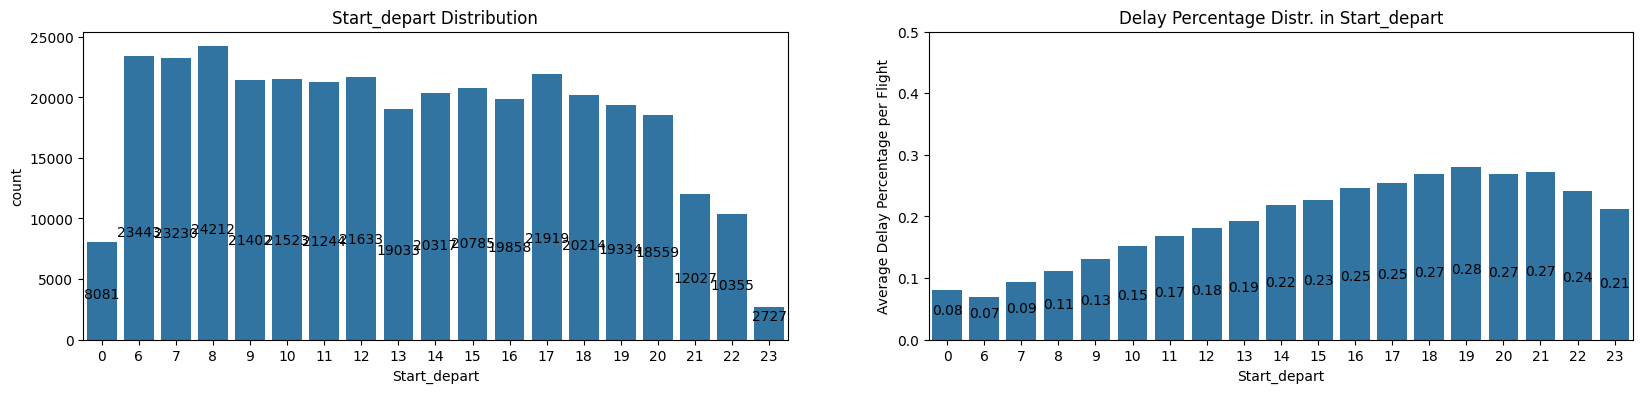

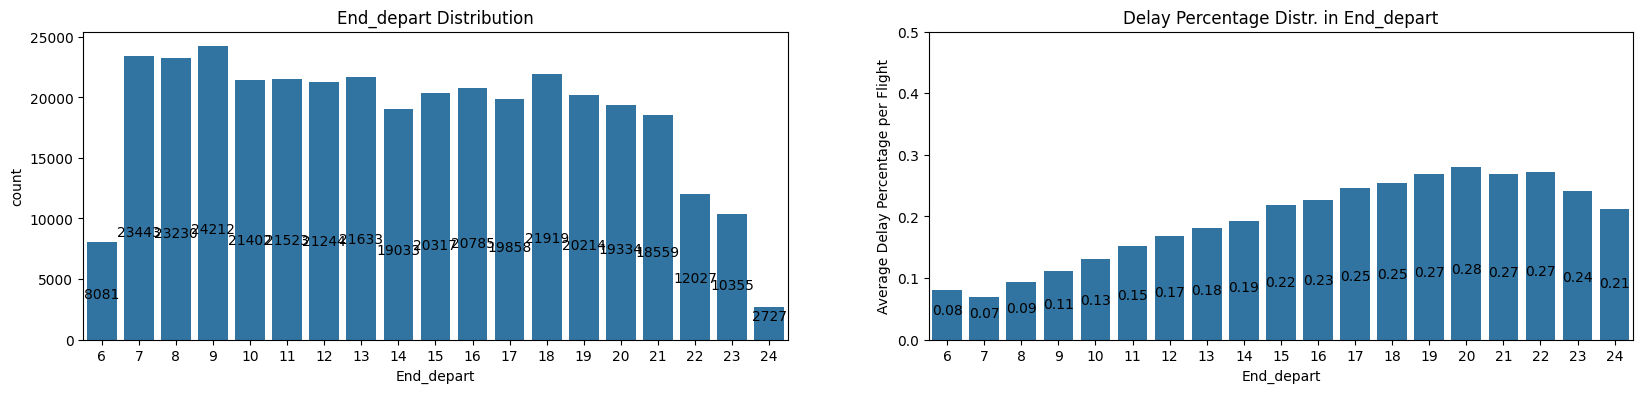

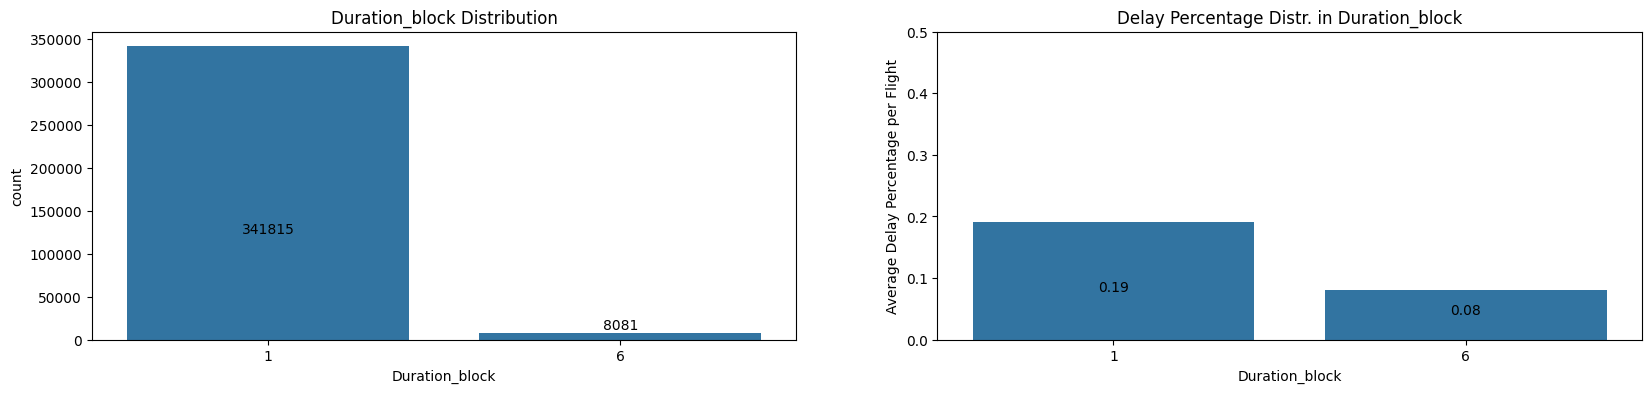

In [72]:
# Visualize Distributions of Categorical Variables
new_features = ['START_DEPART', 'END_DEPART', 'DURATION_BLOCK']

for column in new_features:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4))

    # Figure #1: Bar Chart of the Categorical Feature Counts
    sns.countplot(x=column, data=df, ax=axes[0])
    axes[0].set_xlabel(column.capitalize())
    axes[0].set_title(f"{column.capitalize()} Distribution")
    add_labels(axes, 0)

    # Compute the percentage of 1s in the binary variable for each category
    category_percent = df.groupby(column)['DEP_DEL15'].mean()
    
    # Figure #2: Bar Chart of the Categrocial Feature vs Delay Percentage
    sns.barplot(x=category_percent.index, y=category_percent.values, ax=axes[1])
    axes[1].set_xlabel(column.capitalize())
    axes[1].set_ylabel("Average Delay Percentage per Flight")
    axes[1].set_ylim(0, 0.5)
    axes[1].set_title(f"Delay Percentage Distr. in {column.capitalize()}")
    add_labels(axes, 1)

plt.show()

Takeaways from Above
- `START_DEPART` and `END_DEPART` have very similar distributions since most
departure blocks have 1 hour durations. This means `END_DEPART` isn't really 
unneccessary.
  - Both show that delay percentages rise the later the departure block period in the 
  day. 
- There is a severe data imbalance in duration block towards the 1-hour durations
than the 6-hours.
- The 6-hour duration blocks have much lower delay percentages than 1-hour duration.

In [73]:
# Remove END_DEPART and view updated data
df.drop(columns=['END_DEPART'])
test_df.drop(columns=['END_DEPART'])
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,START_DEPART,END_DEPART,DURATION_BLOCK
0,8,7,0,2,5,12,157,Delta Air Lines Inc.,9144,91062,644,1093478,12460183,0.000144,0.000149,28,Friendship International,39.176,-76.671,Detroit Metro Wayne County,0.0,0.0,0.0,87.0,4.70,0.168586,0.181482,0.196519,0.308386,18,19,1
1,12,4,0,4,4,37,160,Delta Air Lines Inc.,18534,81498,2967,2780593,12460183,0.000144,0.000149,20,Los Angeles International,33.942,-118.408,Louis Armstrong New Orleans International,0.0,0.0,0.0,67.0,4.25,0.157390,0.246022,0.181618,0.249617,16,17,1
2,4,3,0,4,6,15,143,Southwest Airlines Co.,7450,110752,3241,1023434,13382999,0.000062,0.000099,13,San Diego International Lindbergh Fl,32.733,-117.187,Austin - Bergstrom International,0.0,0.0,0.0,75.0,5.82,0.215726,0.192585,0.127616,0.261309,18,19,1
3,8,1,0,5,3,6,143,Southwest Airlines Co.,2079,114987,563,178477,13382999,0.000062,0.000099,18,Will Rogers World,35.392,-97.602,Lambert-St. Louis International,0.0,0.0,0.0,103.0,10.96,0.192550,0.242601,0.181217,0.197745,13,14,1
4,11,1,0,2,1,3,143,Southwest Airlines Co.,1362,108130,380,146009,13382999,0.000062,0.000099,13,Long Beach Daugherty Field,33.818,-118.151,NONE,0.0,0.0,0.0,70.0,7.61,0.173056,0.187867,0.152293,0.076535,7,8,1


We should also remove average passengers in the departing airport and airline 
per month (`AVG_MONTHLY_PASS_AIRPORT` and `AVG_MONTHLY_PASS_AIRLINE`) from the 
dataset as they are highly correlated with the average flights in the departing 
airport and airline per month `AIRPORT_FLIGHTS_MONTH` and `AIRLINE_FLIGHTS_MONTH`
respectively. 

We can also remove `DEPARTING_AIRPORT`, `PREVIOUS_AIRPORT`, and `CARRIER_NAME`, 
as the cardinality for those categorical values are too high to encode. Also,
there are metrics that tell more useful information about the airport or airline
, rather than the name, such as the historical delay percentage and average 
passengers per month.

In [74]:
df.drop(columns=['AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
                'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'CARRIER_NAME'],
        inplace=True)
test_df.drop(columns=['AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
                'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'CARRIER_NAME'],
        inplace=True)

### Feature Scaling

The scales of each feature varies quite a bit in this dataset. 
`FLT_ATTENDANTS_PER_PASS` and `GROUND_SERV_PER_PASS` have extremely low values 
(All less than 0.001) while `AIRLINE_FLIGHTS_MONTH` have extremely high values
(All greater than 10 thousand).
This could pose a problem when training a model, as it causes bias to put higher
weights for higher scales and lower weights for lower scales. To fix that, I 
will use standardization on the entire dataset.

In [75]:
# Initialize the scaler
scaler = StandardScaler()

In [76]:
# Fit and Transform All Numeric Features
columns_to_scale = df.columns.difference(
    ['MONTH', 'DAY_OF_WEEK', 'DISTANCE_GROUP', 'DEP_TIME_BLK', 'SEGMENT_NUMBER',
     'DEP_DEL15', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT',
     'START_DEPART', 'END_DEPART', 'DURATION_BLOCK'])
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
test_df[columns_to_scale] = scaler.fit_transform(test_df[columns_to_scale])

df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,START_DEPART,END_DEPART,DURATION_BLOCK
0,8,7,0,2,5,-0.735799,0.500797,-0.399523,0.823850,-0.661214,0.539823,0.280193,2.374929,0.447968,0.980338,-0.305053,-0.100979,-0.126028,0.846921,-1.009747,-0.433090,-0.153037,0.193033,1.535427,18,19,1
1,12,4,0,4,4,0.425363,0.565191,0.663052,0.545567,-0.113476,0.539823,0.280193,1.222432,-0.501974,-1.350635,-0.305053,-0.100979,-0.126028,-0.240808,-1.134502,-0.668957,1.400100,-0.196400,0.778872,16,17,1
2,4,3,0,4,6,-0.596460,0.200290,-0.591217,1.396769,-0.048870,-0.411491,-0.788698,0.213997,-0.721400,-1.282444,-0.305053,-0.100979,-0.126028,0.194284,-0.699246,0.559979,0.114148,-1.607677,0.929396,18,19,1
3,8,1,0,5,3,-1.014478,0.200290,-1.199000,1.519995,-0.680313,-0.411491,-0.788698,0.934308,-0.238807,-0.188639,-0.305053,-0.100979,-0.126028,1.717105,0.725731,0.071738,1.317758,-0.206864,0.111108,13,14,1
4,11,1,0,2,1,-1.153818,0.200290,-1.280136,1.320477,-0.723462,-0.411491,-0.788698,0.213997,-0.524479,-1.336282,-0.305053,-0.100979,-0.126028,-0.077649,-0.203000,-0.338923,0.000626,-0.962756,-1.449248,7,8,1


### Dealing with Data Imbalance

Only 19% of this dataset contain delayed flights. To address this issue, I
will apply SMOTE to synthetically produce delayed flight data.

## Training and Testing Models

The goal of this section is to find what type of model performs the best in
predicting whether a flight is delayed based on various features about the 
flight, airport, airline, weather, etc. Let's first split up the features and
target variable.

In [77]:
# Seperate features and target variable
X_train = df.drop('DEP_DEL15', axis=1)
y_train = df['DEP_DEL15']
X_test = test_df.drop('DEP_DEL15', axis=1)
y_test = test_df['DEP_DEL15']

## Logistic Regression
The first type of model I am testing is Logistic Regression. For the 
assumptions, each flight's data isn't independent to other flights, as one delay
could lead to future delays. However, we randomly sampled 500 thousand flights
out of 4 million to mitigate this problem as much as possible. We removed 
variables that are highly correlated to each other, avoiding multicollinearity. 

The assumptions are met so let's see how this type of model performs.

In [78]:
# Initialize and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.81273
